In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
import torch_geometric.transforms as T
from torch_geometric.datasets.dblp import DBLP
import matplotlib.pyplot as plt

## DBLP

In [2]:
dataset = DBLP(root='./dblp_data', transform=T.Constant(node_types='conference'))
data = dataset[0]
author = data['author'].x.tolist()
df = pd.DataFrame(author)
df['class'] = data['author'].y.tolist()

Extracting dblp_data/raw/DBLP_processed.zip
Processing...
Done!


### Feature selection from Bag-of-Words features of Author node using Variance Threshold

In [3]:
# Feature selection for Author class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)
X = class0

# selects important features using variance threshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
fitted_X = sel.fit_transform(X)
imp_feat0 = pd.DataFrame(fitted_X)
imp_feat0 = imp_feat0.drop(imp_feat0[imp_feat0.sum(axis=1) == 0.0].index)
imp_feat0.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
# Feature selection for Author class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)
X = class1

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
fitted_X = sel.fit_transform(X)
imp_feat1 = pd.DataFrame(fitted_X)
imp_feat1 = imp_feat1.drop(imp_feat1[imp_feat1.sum(axis=1) == 0.0].index)
imp_feat1.head()

,0,1,2,3,4
2,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,0.0


In [5]:
# Feature selection for Author class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)
X = class2

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
fitted_X = sel.fit_transform(X)
imp_feat2 = pd.DataFrame(fitted_X)
imp_feat2 = imp_feat2.drop(imp_feat2[imp_feat2.sum(axis=1) == 0.0].index)
imp_feat2.head()

,0,1,2
1,0.0,0.0,1.0
2,1.0,1.0,1.0
3,1.0,0.0,1.0
5,1.0,0.0,1.0
6,1.0,1.0,1.0


In [6]:
# Feature selection for Author class 3
class3 = df[df['class'] == 3].drop(['class'], axis=1)
X = class3

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
fitted_X = sel.fit_transform(X)
imp_feat3 = pd.DataFrame(fitted_X)
imp_feat3 = imp_feat3.drop(imp_feat3[imp_feat3.sum(axis=1) == 0.0].index)
imp_feat3.head()

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Features of each class of Author node sampled using Diffusion Models

In [7]:
sampled0  = pd.DataFrame(torch.load('../sampled_features/dblp/feature0.pt')[0].cpu().numpy())
sampled0.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [8]:
sampled1  = pd.DataFrame(torch.load('../sampled_features/dblp/feature1.pt')[0].cpu().numpy())
sampled1.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0


In [9]:
sampled2  = pd.DataFrame(torch.load('../sampled_features/dblp/feature2.pt')[0].cpu().numpy())
sampled2.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [10]:
sampled3  = pd.DataFrame(torch.load('../sampled_features/dblp/feature3.pt')[0].cpu().numpy())
sampled3.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Comparison of real and synthetic distributions for the most important feature

In [11]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

In [12]:
def feature_selection(df):
    col_sum = df.sum(axis=0)
    sorted_colsum = sorted(col_sum, reverse=True)

    index_list = []
    for i in sorted_colsum[:1]:
        index_list.append(list(col_sum).index(i))
        imp_feat = df[index_list].reset_index(drop=True)
        return imp_feat

In [13]:
plt.rcParams.update({'axes.ymargin': 0.2})

In [14]:
def compare_plot_real_syn(df):
    df_new = df.apply(pd.value_counts).T
    
    ax=df_new.plot.bar(width=0.4,figsize=(7,7))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    for i in ax.containers:
        ax.bar_label(i,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.legend(fontsize="20", loc ="lower center")
    plt.ylabel('no. of samples',fontsize=20)
    plt.tight_layout()
    plt.show();

Author class 0

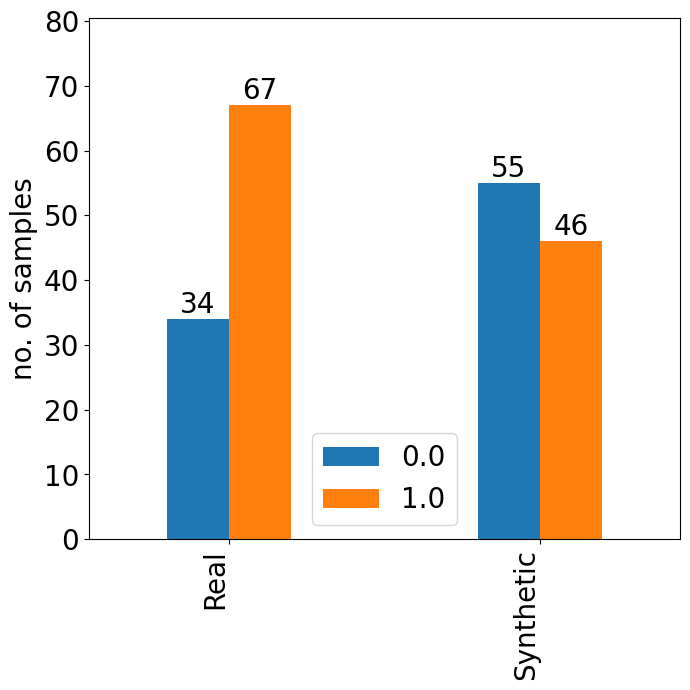

In [15]:
real_class0= np.array(imp_feat0)
syn_imp_feat0=feature_selection(sampled0)
real_imp_feat0=feature_selection(pd.DataFrame(real_class0))
df0_compare_impfeat = pd.DataFrame()
df0_compare_impfeat['Real'] = real_imp_feat0[:syn_imp_feat0.shape[0]]
df0_compare_impfeat['Synthetic'] = syn_imp_feat0
compare_plot_real_syn(df0_compare_impfeat)

Author class 1

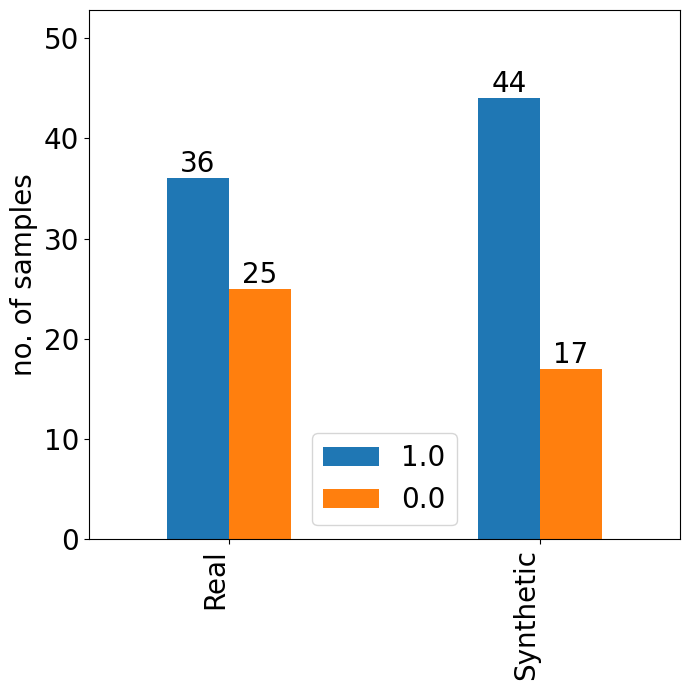

In [16]:
real_class1= np.array(imp_feat1)
syn_imp_feat1=feature_selection(sampled1)
real_imp_feat1=feature_selection(pd.DataFrame(real_class1))
df1_compare_impfeat = pd.DataFrame()
df1_compare_impfeat['Real'] = real_imp_feat1[:syn_imp_feat1.shape[0]]
df1_compare_impfeat['Synthetic'] = syn_imp_feat1
compare_plot_real_syn(df1_compare_impfeat)

Author class 2

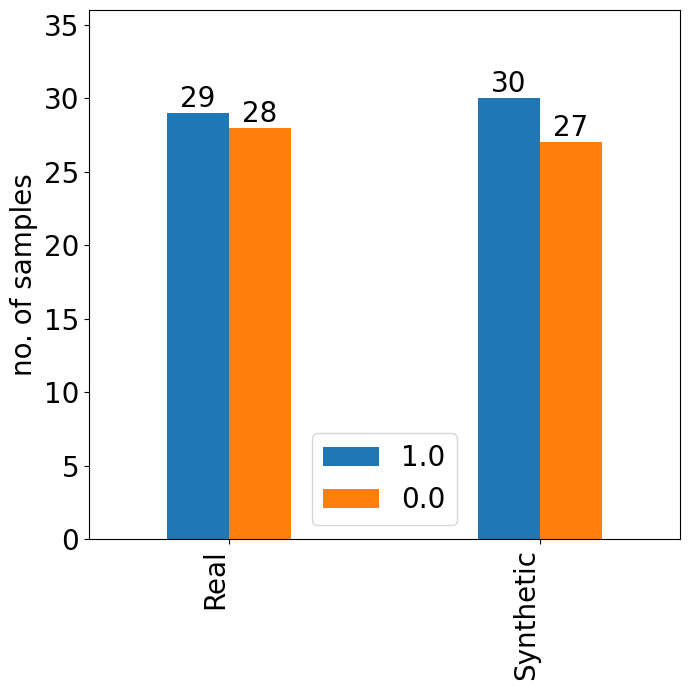

In [17]:
real_class2= np.array(imp_feat2)
syn_imp_feat2=feature_selection(sampled2)
real_imp_feat2=feature_selection(pd.DataFrame(real_class2))
df2_compare_impfeat = pd.DataFrame()
df2_compare_impfeat['Real'] = real_imp_feat2[:syn_imp_feat2.shape[0]]
df2_compare_impfeat['Synthetic'] = syn_imp_feat2
compare_plot_real_syn(df2_compare_impfeat)

Author class 3

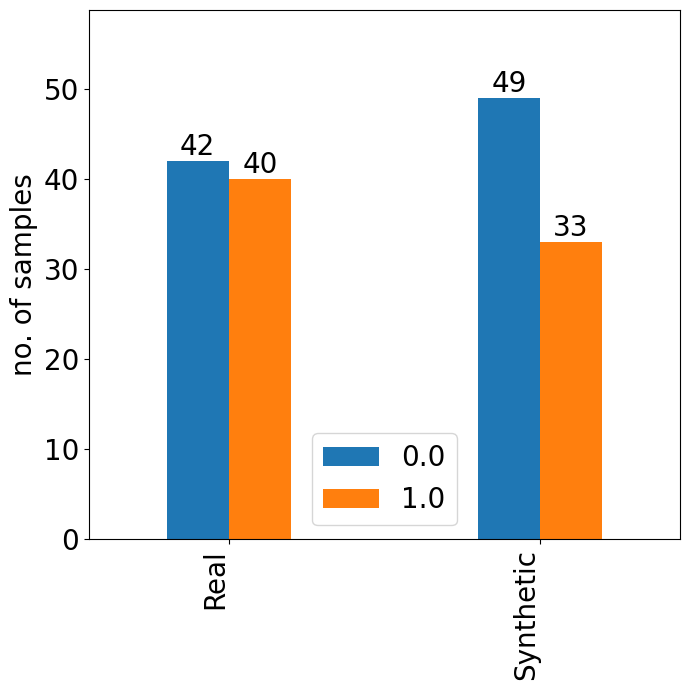

In [18]:
real_class3 = np.array(imp_feat3)
syn_imp_feat3=feature_selection(sampled3)
real_imp_feat3=feature_selection(pd.DataFrame(real_class3))
df3_compare_impfeat = pd.DataFrame()
df3_compare_impfeat['Real'] = real_imp_feat3[:syn_imp_feat3.shape[0]]
df3_compare_impfeat['Synthetic'] = syn_imp_feat3
compare_plot_real_syn(df3_compare_impfeat)

### Pairwise cosine similarity of all features for real and synthetic distributions

Author class 0

In [19]:
cosine_sim(real_class0,sampled0)

array([[1.        , 0.5       , 0.70710678, ..., 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.35355339, 0.5       , ..., 0.        , 0.5       ,
        0.        ],
       [0.        , 0.35355339, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.70710678, ..., 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.35355339, 0.5       , ..., 0.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
        0.        ]])

In [19]:
sns.set(font_scale=1.4)

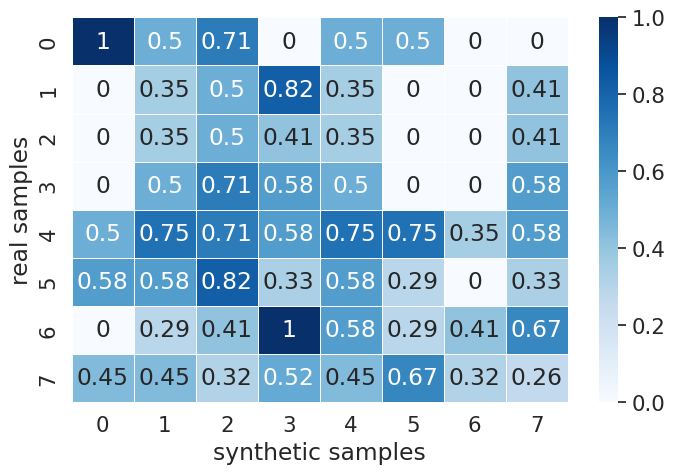

In [23]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

Author class 1

In [24]:
cosine_sim(real_class1,sampled1)

array([[0.        , 0.57735027, 0.40824829, ..., 0.57735027, 0.57735027,
        0.57735027],
       [0.        , 0.        , 0.5       , ..., 0.35355339, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.        , 0.70710678, 0.5       , ..., 0.35355339, 0.35355339,
        0.70710678],
       [0.        , 0.        , 0.70710678, ..., 0.        , 0.5       ,
        0.        ]])

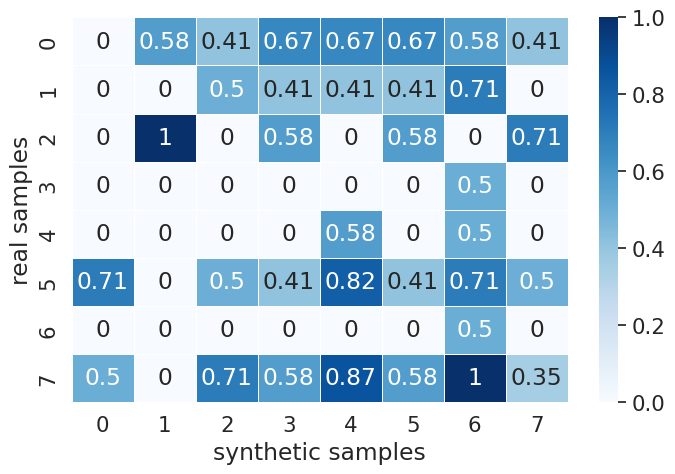

In [25]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

Author class 2

In [26]:
cosine_sim(real_class2,sampled2)

array([[0.        , 0.70710678, 1.        , ..., 0.        , 0.        ,
        0.70710678],
       [0.57735027, 0.81649658, 0.57735027, ..., 0.57735027, 0.57735027,
        0.81649658],
       [0.        , 0.5       , 0.70710678, ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [1.        , 0.70710678, 0.        , ..., 1.        , 1.        ,
        0.70710678],
       [1.        , 0.70710678, 0.        , ..., 1.        , 1.        ,
        0.70710678],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

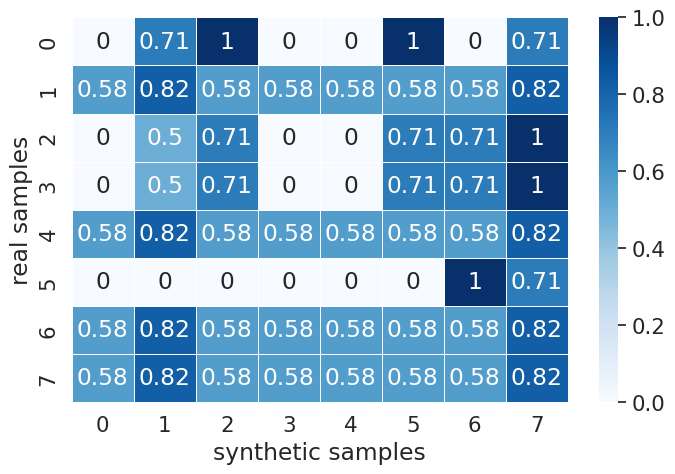

In [27]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

Author class 3

In [28]:
cosine_sim(real_class3,sampled3)

array([[0.        , 0.70710678, 0.        , ..., 0.70710678, 0.        ,
        0.        ],
       [0.57735027, 0.40824829, 0.57735027, ..., 0.        , 0.81649658,
        0.        ],
       [0.        , 0.40824829, 0.        , ..., 0.40824829, 0.40824829,
        0.40824829],
       ...,
       [0.        , 0.5       , 0.70710678, ..., 0.        , 1.        ,
        0.        ],
       [0.70710678, 0.5       , 0.        , ..., 0.        , 0.5       ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

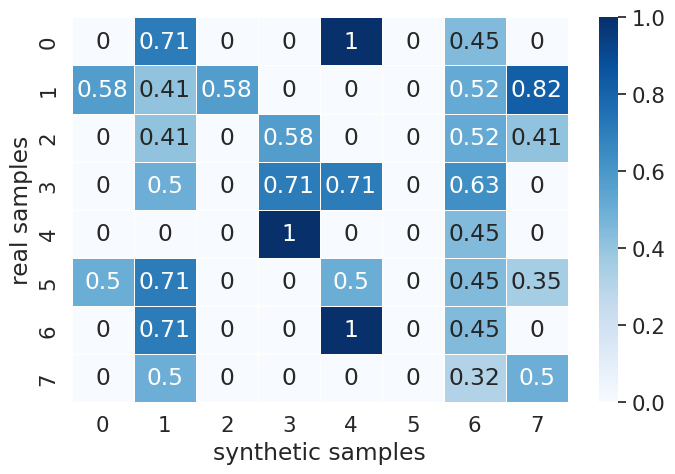

In [29]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class3[:8],sampled3[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()